   StudentID  GPA  StudyHours
0          1  2.5          10
1          2  3.0          15
2          3  3.2          18
3          4  3.8          35
4          5  2.9          12
5          6  1.8           6
6          7  2.2           8
7          8  3.9          40
8          9  3.5          32
9         10  1.6           5


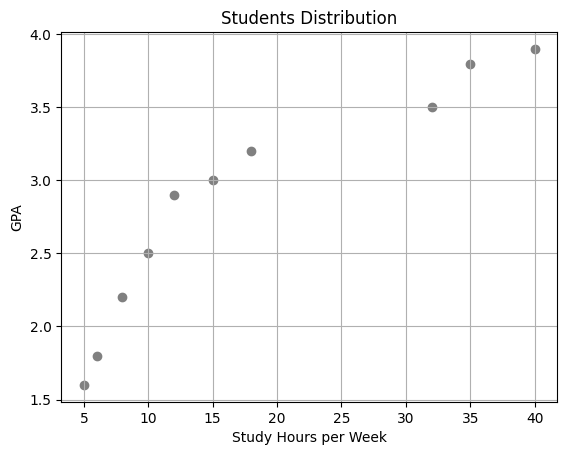

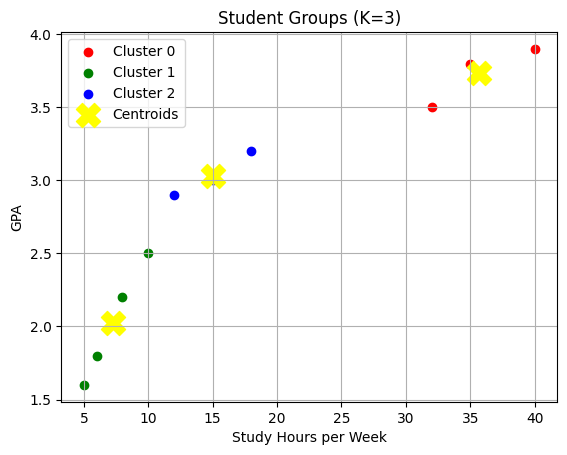

c:\Users\SS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


New student belongs to Cluster: 2


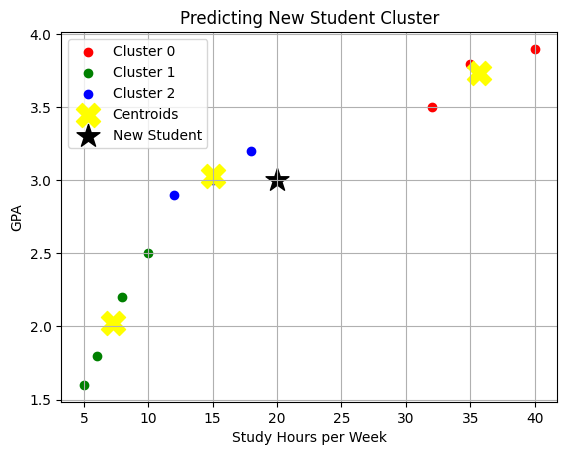

In [1]:
# Part 1: Creating the Dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a custom dataset
data = {
    'StudentID': [1,2,3,4,5,6,7,8,9,10],
    'GPA': [2.5,3.0,3.2,3.8,2.9,1.8,2.2,3.9,3.5,1.6],
    'StudyHours': [10,15,18,35,12,6,8,40,32,5]
}
df = pd.DataFrame(data)
print(df)

# Part 2: Selecting Features for Clustering
X = df[['StudyHours', 'GPA']]

# Part 3: Plotting the Raw Data
plt.scatter(X['StudyHours'], X['GPA'], c='gray')
plt.xlabel('Study Hours per Week')
plt.ylabel('GPA')
plt.title('Students Distribution')
plt.grid(True)
plt.show()

# Part 4: Applying K-Means Clustering (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Part 5: Visualizing the Clusters
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df[df['Cluster'] == i]['StudyHours'],
                df[df['Cluster'] == i]['GPA'],
                label=f'Cluster {i}', c=colors[i])

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='yellow',
            marker='X', label='Centroids')
plt.xlabel('Study Hours per Week')
plt.ylabel('GPA')
plt.title('Student Groups (K=3)')
plt.legend()
plt.grid(True)
plt.show()

# Part 6: Predicting for a New Student
# New student's data (StudyHours=20, GPA=3.0)
new_student = [[20, 3.0]]
predicted_cluster = kmeans.predict(new_student)
print("New student belongs to Cluster:", predicted_cluster[0])

# Part 7: Visualizing New Student on the Graph
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df[df['Cluster'] == i]['StudyHours'],
                df[df['Cluster'] == i]['GPA'],
                c=colors[i], label=f'Cluster {i}')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='yellow',
            marker='X', label='Centroids')

# Plot new student
plt.scatter(20, 3.0, c='black', marker='*', s=300, label='New Student')

plt.xlabel('Study Hours per Week')
plt.ylabel('GPA')
plt.title('Predicting New Student Cluster')
plt.legend()
plt.grid(True)
plt.show()